# Domácí úkol č. 1 - 🕵️‍♀️ Explorační analýza dat

## 📚 Data
V souborech `intakes.csv` a `outcomes.csv` naleznete data z útulku ve městě Austin, Texas USA. Data pocházejí z oficiálního [zdroje otevřených dat města Austin](https://data.austintexas.gov/).

Dataset [intakes](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Intakes/wter-evkm) obsahuje data o přijatých zvířatech od 1. 10. 2013 do 27. 4 2022. Dataset [outcomes](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Outcomes/9t4d-g238) obsahuje údaje o zvířatech, která útulek opustila (např. byla adoptována, vrácena majiteli a podobně) za tentýž časový interval. Může se stát, že zvířata přijatá do 1. 10. 2013 se nevyskytují v `intakes.csv` (data se ještě neshromažďovala), ale budou mít záznam v `outcomes.csv`, pokud útulek po tomto datu opustila.

☝️ Každý dataset může **stejné zvíře obsahovat víckrát** (1. některá zvířata se do útulku vracela - to je trochu komplikace, pokud byste datasety chtěli spojit - pro řešení úkolu spojování ale není nutné, 2. některé záznamy jsou duplicitní - ty můžete odstranit, jedná se o chybu). 

## Zadání
> ☝️ Používejte markdown buňky! Zdůvodňujte všechny důležité kroky, popisujte vizualizace a co je z nich možné pozorovat. Za nepřehledný domácí úkol nebudou uděleny body.

Za řádné průběžné komentování a vizuální prezentaci postupu a výsledků lze získat až 3 body.

**✨ Příprava dat** (celkem 4 body)
* Importujte potřebné balíčky.
* Načtěte si datasety intakes a outcomes z příslušných csv souborů.
* Seznamte se s oběma datasety a svá zjištění komentujte:
  * Příklad informací, které lze zjistit: počet řádků datasetu, počet a význam příznaků, datový typ příznaků a počet jejich unikátních hodnot, ...
* Vyčistěte a zkonvertujte data:
  * Zjistěte jakým způsobem jsou v datasetu uváděny chybějící hodnoty a v případě potřeby je přepište na NaN.
  * Zkonvertujte kategorické příznaky na typ category.
  * Převeďte příznak Age upon Intake/Outcome na numerický příznak.
  * Převeďte příznak DateTime na typ datetime64.
  * Proveďte všechny další úpravy, které vám dávají smysl (konverze dalších příznaků, odstranění duplicitních údajů, přidání nových příznaků, ...).
  
**🖊️ Deskriptivní statistiky** (celkem 6 bodů)

Volbu vhodných statistik pro daný typ dat komentujte a pokud je to možné, využívejte co nejvíce vizualizace.
* Popište příznaky Age upon Intake a DateTime (původně z datasetu intakes) pomocí univariačních deskriptivních statistik.
* Vyberte si tři další příznaky a popište je pomocí univariačních deskriptivních statistik, které jsou pro ně vhodné.
* Vyberte si dva příznaky, mezi kterými by mohla být korelace (dvojice typu Age upon Intake a Age upon Outcome neuznáváme) a popište jejich vztah pomocí bivariačních deskriptivních statistik.

**❓ Zadané otázky** (2 body za každou otázku, celkem max. 6 bodů)

Pomocí vhodných vizualizací odpovídejte na následující otázky:
* Závisí typ odchodu zvířete z útulku (Outcome Type) na typu příchodu (Intake Type)? Pokud chcete, uvažujte pro zjednodušení pouze zvířata, která se v každém datasetu vyskytují právě jednou.
* Hraje věk zvířete roli při adopci?
* Je příjem zvířat v rámci roku konstantní nebo existují období s větší/nižší zátěží?

K jedné otázce můžete v případě potřeby vytvořit více vizualizací. Výsledek vizualizace a všechny mezikroky komentujte.

**❓ Vlastní otázky** (2 body za každou otázku, celkem max. 6 bodů)

Vymyslete **minimálně tři** vlastní otázky a odpovídejte na ně vhodnými vizualizacemi. Otázky můžete postavit na již zmíněných datasetech. Také je možné využít třetí dataset [locations](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Found-Pets-Map/hye6-gvq2), který naleznete v souboru locations.csv, nebo si můžete stáhnout nějaká další zajímavá data, která souvisí s tímto tématem.

Dataset locations poskytuje informace o všech toulavých kočkách a psech, které jsou v databázi útulku **méně než týden**. Většina se nachází v útulku, ale část z nich je u dobrovolníků – tato informace je uvedena ve sloupci At AAC (AAC – Austin Animal Center).

### Bodové hodnocení
Shrnutí bodů, které můžete nejvýše získat:
- 3 body za komentáře a vizuální prezentaci postupu a výsledků,
- 4 body za přípravu dat,
- 6 bodů za deskriptivní statistiku,
- 6 bodů za zodpovězení všech zadaných otázek,
- 6 bodů za definici a zodpovězení minimálně tří vlastních otázek.

Celkem lze za domácí úkol č. 1 získat maximálně 25 bodů.

In [160]:
# a teď už je to na vás 💪
# níže vložte své řešení

# NOTE: 
* Úkol jsem vypracoval s pomocí notebooků ze cvičení. Kódy ze cvičení jsem upravil pro vlastní potřeby.
* Na tvorbu a úpravu grafů jsem využíval:
    * *https://matplotlib.org/stable/plot_types/index.html*
    * *https://seaborn.pydata.org/generated/seaborn.heatmap.html*
    * *https://seaborn.pydata.org/generated/seaborn.countplot.html*
    * *https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html*

# Import knihoven
**pandas** pro manipulaci a analýzu dat <br>
**matplotlib** pro vizualizaci dat (grafy) <br>
**numpy** pro matematické výpočty <br>
**seaborn** pro vizualizaci dat (grafy)

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Bez násl. řádku někdy nefunguje vykreslování grafů v Jupyter noteboocích
# (source: BI-ML1, 1. cvičení: 01_tutorial_cs)
%matplotlib inline 

# Informace o datasetu <u>intakes</u>
* 12 sloupců (příznaků)
* 138 585 řádek, pouze **Name** má 97 316 řádek 
* Všechny sloupce jsou typu *"object"*
* Počet unikátních hodnot je v poslední tabulce
* Chybějící hodnoty jsou reprezentovány jako *"NaN"* a *"Unknown"*

In [162]:
intakes = pd.read_csv("intakes.csv")
print("Show 5 records\n-----------------")
display(intakes.iloc[2219:2224])
print("Basic info\n-----------------")
display(intakes.info())
print("Number of uniques records\n-----------------")
display(intakes.nunique())

Show 5 records
-----------------


,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
2219,A773757,Unknown,06/05/2018 11:32:00 AM,June 2018,11005 Mint Julep Dr in Austin (TX),Stray,Injured,Cat,Neutered Male,11 years,Domestic Shorthair Mix,Cream Tabby
2220,A805209,Mocha,10/03/2019 09:17:00 AM,October 2019,Aberedeen in Austin (TX),Stray,Normal,Dog,Intact Female,3 months,German Shepherd,Black/Brown
2221,A839346,*Frida,07/20/2021 02:39:00 PM,July 2021,5717 Palo Blanco in Austin (TX),Stray,Normal,Cat,Intact Female,2 months,Domestic Shorthair,Gray
2222,A682196,NaN,06/25/2014 01:12:00 PM,June 2014,2624 Piping Rock Trl in Austin (TX),Stray,Normal,Cat,Intact Female,2 years,Domestic Medium Hair Mix,Black
2223,A756016,Bubbles,08/13/2017 01:25:00 PM,August 2017,1516 Nash Hernandez in Austin (TX),Stray,Normal,Dog,Intact Female,1 year,Miniature Poodle Mix,White


Basic info
-----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138585 entries, 0 to 138584
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         138585 non-null  object
 1   Name              97316 non-null   object
 2   DateTime          138585 non-null  object
 3   MonthYear         138585 non-null  object
 4   Found Location    138585 non-null  object
 5   Intake Type       138585 non-null  object
 6   Intake Condition  138585 non-null  object
 7   Animal Type       138585 non-null  object
 8   Sex upon Intake   138584 non-null  object
 9   Age upon Intake   138585 non-null  object
 10  Breed             138585 non-null  object
 11  Color             138585 non-null  object
dtypes: object(12)
memory usage: 12.7+ MB


None

Number of uniques records
-----------------


Animal ID           123890
Name                 23544
DateTime             97442
MonthYear              103
Found Location       58367
Intake Type              6
Intake Condition        15
Animal Type              5
Sex upon Intake          5
Age upon Intake         54
Breed                 2741
Color                  616
dtype: int64

# Informace o datasetu <u>outcomes</u>
* 12 sloupců (příznaků)
* 138 769 řádek, pouze **Name** má 97 316 řádek a **Outcome Subtype** má 63 435 řádek
* Všechny sloupce jsou typu *"object"*
* Počet unikátních hodnot je v poslední tabulce
* Chybějící hodnoty jsou reprezentovány jako *"NaN"* a *"Unknown"*

In [163]:
outcomes = pd.read_csv("outcomes.csv")
print("First 5 records\n-----------------")
display(outcomes.head())
print("Basic info\n-----------------")
display(outcomes.info())
print("Number of uniques records\n-----------------")
display(outcomes.nunique())

First 5 records
-----------------


,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A794011,Chunk,05/08/2019 06:20:00 PM,May 2019,05/02/2017,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
1,A776359,Gizmo,07/18/2018 04:02:00 PM,Jul 2018,07/12/2017,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
2,A821648,NaN,08/16/2020 11:38:00 AM,Aug 2020,08/16/2019,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray
3,A720371,Moose,02/13/2016 05:59:00 PM,Feb 2016,10/08/2015,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
4,A674754,NaN,03/18/2014 11:47:00 AM,Mar 2014,03/12/2014,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby


Basic info
-----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138769 entries, 0 to 138768
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         138769 non-null  object
 1   Name              97514 non-null   object
 2   DateTime          138769 non-null  object
 3   MonthYear         138769 non-null  object
 4   Date of Birth     138769 non-null  object
 5   Outcome Type      138746 non-null  object
 6   Outcome Subtype   63435 non-null   object
 7   Animal Type       138769 non-null  object
 8   Sex upon Outcome  138768 non-null  object
 9   Age upon Outcome  138764 non-null  object
 10  Breed             138769 non-null  object
 11  Color             138769 non-null  object
dtypes: object(12)
memory usage: 12.7+ MB


None

Number of uniques records
-----------------


Animal ID           124068
Name                 23425
DateTime            115364
MonthYear              103
Date of Birth         7576
Outcome Type             9
Outcome Subtype         26
Animal Type              5
Sex upon Outcome         5
Age upon Outcome        54
Breed                 2749
Color                  619
dtype: int64

# Příprava datasetu <u>**Intakes**</u>
* Smazání **MonthYear** (tato informace již je v **DateTime**)
* Změna datatypu **Age upon Intake** na numerický příznak (údaj bude v letech)
* Smazání duplicitních záznamů
* Smazání ' * ' ve sloupci **Name**
* Změna **Sex upon Intake** 'NaN' hodnot na 'Unknown'
* Změna kategorických příznaků na *"category"*
* Změna **DateTime** datatypu to *"datetime64"*
* Smazání 'Unknown' záznamů u **Name** (pravděpodobně chybný údaj, většinou se zvířeti přiřadí nové jméno)

In [164]:
# Drop column MonthYear
intakes = intakes.drop('MonthYear', axis=1)

# Change Age upon intake to num
def get_date(arr):
    cnt = 0
    if arr[1] == 'years' or arr[1] == 'year':
        cnt = int(arr[0]) * 365
    elif arr[1] == 'month' or arr[1] == 'months':
        cnt = int(arr[0]) * 30
    elif arr[1] == 'weeks' or arr[1] == 'week':
        cnt = int(arr[0]) * 7
    elif arr[1] == 'day' or arr[1] == 'days':
        cnt = int(arr[0])
    return abs(round(abs(cnt/365),1))

# First split data into list [number, string]
intakes['Age upon Intake'] = intakes['Age upon Intake'].str.split(" ")
# Apply get_date function on splited intakes
intakes['Age upon Intake'] = intakes['Age upon Intake'].apply(get_date)

# Print number of duplicated records and delete them
print("\nNumber of duplicates:", intakes.duplicated().sum())
intakes = intakes.drop_duplicates(keep='first')

# Remove ' * ' from column Name
intakes['Name'] = intakes['Name'].str.replace('*', '', regex=True)

# Change Sex upon Intake NaN values to unknown
intakes['Sex upon Intake'] = intakes['Sex upon Intake'].fillna("Unknown")

# Change datatype to 'category' for categorical columns
column_to_category = ['Animal ID', 'Name', 'Found Location', 
    'Intake Type', 'Intake Condition', 'Animal Type',
    'Sex upon Intake', 'Breed', 'Color']

for i in column_to_category:
    intakes[i] = intakes[i].astype('category')

# Change DateTime dtype to datetime64
intakes['DateTime'] = intakes['DateTime'].astype('datetime64')    

# Change "unknown" to NaN
intakes = intakes.dropna(subset=['Name'])
rows_with_unknown = intakes.loc[intakes['Name'].str.contains("Unknown", case=False)]
display(rows_with_unknown.head())

# Check results
print(intakes.info())
display(intakes.head())


Number of duplicates: 20


,Animal ID,Name,DateTime,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
2219,A773757,Unknown,2018-06-05 11:32:00,11005 Mint Julep Dr in Austin (TX),Stray,Injured,Cat,Neutered Male,11.0,Domestic Shorthair Mix,Cream Tabby
3515,A770471,Unknown,2018-04-20 11:53:00,3709 Thompson Lane #B in Austin (TX),Stray,Normal,Cat,Intact Female,0.1,Domestic Shorthair Mix,Black/White
11115,A770473,Unknown,2018-04-20 11:53:00,3709 Thompson Lane #B in Austin (TX),Stray,Normal,Cat,Intact Male,0.1,Domestic Shorthair Mix,Brown Tabby
17008,A771283,Unknown,2018-05-02 22:52:00,2210 S Fm 973 in Travis (TX),Wildlife,Normal,Other,Unknown,1.0,Bat Mix,Brown/Black
18229,A773797,Unknown,2018-06-05 15:53:00,2336 Douglas St in Austin (TX),Wildlife,Sick,Other,Unknown,2.0,Bat Mix,Brown/Black


<class 'pandas.core.frame.DataFrame'>
Int64Index: 97300 entries, 0 to 138584
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Animal ID         97300 non-null  category      
 1   Name              97300 non-null  category      
 2   DateTime          97300 non-null  datetime64[ns]
 3   Found Location    97300 non-null  category      
 4   Intake Type       97300 non-null  category      
 5   Intake Condition  97300 non-null  category      
 6   Animal Type       97300 non-null  category      
 7   Sex upon Intake   97300 non-null  category      
 8   Age upon Intake   97300 non-null  float64       
 9   Breed             97300 non-null  category      
 10  Color             97300 non-null  category      
dtypes: category(9), datetime64[ns](1), float64(1)
memory usage: 12.1 MB
None


,Animal ID,Name,DateTime,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,A786884,Brock,2019-01-03 16:19:00,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2.0,Beagle Mix,Tricolor
1,A706918,Belle,2015-07-05 12:59:00,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8.0,English Springer Spaniel,White/Liver
2,A724273,Runster,2016-04-14 18:43:00,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,0.9,Basenji Mix,Sable/White
4,A682524,Rio,2014-06-29 10:38:00,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4.0,Doberman Pinsch/Australian Cattle Dog,Tan/Gray
5,A743852,Odin,2017-02-18 12:46:00,Austin (TX),Owner Surrender,Normal,Dog,Neutered Male,2.0,Labrador Retriever Mix,Chocolate


# Příprava datasetu <u>**Outcomes**</u>
* Smazání **MonthYear** (tato informace již je v **DateTime**)
* Smazání 'NaN' záznamů v *"Age upon Outcome"* (kvůli úpravě v *"Age upon Outcome"* nutno smazat dříve)
* Změna datatypu **Age upon Intake** na numerický příznak (údaj bude v letech)
* Smazání duplicitních záznamů
* Smazání ' * ' ve sloupci **Name**
* Změna kategorických příznaků na *"category"*
* Změna **DateTime** datatypu to *"datetime64"*
* Smazání 'unknown' záznamů u **Name** (pravděpodobně chybný údaj, většinou se zvířeti přiřadí nové jméno)

In [165]:
# Drop column MonthYear
outcomes = outcomes.drop('MonthYear', axis=1)

# Delete rows with NaN values in Age upon Outcome
outcomes = outcomes.dropna(subset=['Age upon Outcome'])

# Change Age upon intake to num
def get_date(arr):
    cnt = 0
    if arr[1] == 'years' or arr[1] == 'year':
        cnt = int(arr[0]) * 365
    elif arr[1] == 'month' or arr[1] == 'months':
        cnt = int(arr[0]) * 30
    elif arr[1] == 'weeks' or arr[1] == 'week':
        cnt = int(arr[0]) * 7
    elif arr[1] == 'day' or arr[1] == 'days':
        cnt = int(arr[0])
    return abs(round(abs(cnt/365),1))
 
# First split data into list [number, string]
outcomes['Age upon Outcome'] = outcomes['Age upon Outcome'].str.split(" ")
display(outcomes.head())

# Apply get_date function on splited outcomes
outcomes['Age upon Outcome'] = outcomes['Age upon Outcome'].apply(get_date)

# Print number of duplicated records and delete them
print("\nNumber of duplicates:", outcomes. duplicated().sum())
outcomes = outcomes.drop_duplicates(keep='first')

# Remove ' * ' from column Name
outcomes['Name'] = outcomes['Name'].str.replace('*', '', regex=True)

# Change datatype to 'category' for categorical columns
column_to_category = ['Animal ID', 'Name',  'Outcome Type', 
    'Outcome Subtype', 'Animal Type',
    'Sex upon Outcome', 'Breed', 'Color']

for i in column_to_category:
    outcomes[i] = outcomes[i].astype('category')

# Change DateTime dtype to datetime64
outcomes['DateTime'] = outcomes['DateTime'].astype('datetime64')    

# Change "Unknown" to NaN
outcomes = outcomes.dropna(subset=['Name'])
rows_with_unknown = outcomes.loc[outcomes['Name'].str.contains("Unknown", case=False)]
display(rows_with_unknown.head())

# Check results
display(outcomes.info())
display(outcomes.head())

,Animal ID,Name,DateTime,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A794011,Chunk,05/08/2019 06:20:00 PM,05/02/2017,Rto-Adopt,NaN,Cat,Neutered Male,"[2, years]",Domestic Shorthair Mix,Brown Tabby/White
1,A776359,Gizmo,07/18/2018 04:02:00 PM,07/12/2017,Adoption,NaN,Dog,Neutered Male,"[1, year]",Chihuahua Shorthair Mix,White/Brown
2,A821648,NaN,08/16/2020 11:38:00 AM,08/16/2019,Euthanasia,NaN,Other,Unknown,"[1, year]",Raccoon,Gray
3,A720371,Moose,02/13/2016 05:59:00 PM,10/08/2015,Adoption,NaN,Dog,Neutered Male,"[4, months]",Anatol Shepherd/Labrador Retriever,Buff
4,A674754,NaN,03/18/2014 11:47:00 AM,03/12/2014,Transfer,Partner,Cat,Intact Male,"[6, days]",Domestic Shorthair Mix,Orange Tabby



Number of duplicates: 17


,Animal ID,Name,DateTime,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
1306,A798490,Unknown,2019-06-30 12:15:00,06/26/2017,Euthanasia,Rabies Risk,Other,Unknown,2.0,Bat,Red
3811,A770475,Unknown,2018-04-24 12:20:00,02/28/2018,Transfer,Partner,Cat,Intact Female,0.1,Domestic Shorthair Mix,Gray/White
23917,A770586,Unknown,2018-05-03 00:00:00,04/22/2016,Transfer,Snr,Cat,Intact Male,2.0,American Shorthair Mix,White/Black
29925,A770470,Unknown,2018-04-24 12:19:00,02/28/2018,Transfer,Partner,Cat,Intact Female,0.1,Domestic Shorthair Mix,Brown Tabby
38360,A770476,Unknown,2018-04-24 12:21:00,02/28/2018,Transfer,Partner,Cat,Intact Male,0.1,Domestic Shorthair Mix,Gray/White


<class 'pandas.core.frame.DataFrame'>
Int64Index: 97499 entries, 0 to 138768
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Animal ID         97499 non-null  category      
 1   Name              97499 non-null  category      
 2   DateTime          97499 non-null  datetime64[ns]
 3   Date of Birth     97499 non-null  object        
 4   Outcome Type      97486 non-null  category      
 5   Outcome Subtype   32957 non-null  category      
 6   Animal Type       97499 non-null  category      
 7   Sex upon Outcome  97498 non-null  category      
 8   Age upon Outcome  97499 non-null  float64       
 9   Breed             97499 non-null  category      
 10  Color             97499 non-null  category      
dtypes: category(8), datetime64[ns](1), float64(1), object(1)
memory usage: 10.0+ MB


None

,Animal ID,Name,DateTime,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A794011,Chunk,2019-05-08 18:20:00,05/02/2017,Rto-Adopt,NaN,Cat,Neutered Male,2.0,Domestic Shorthair Mix,Brown Tabby/White
1,A776359,Gizmo,2018-07-18 16:02:00,07/12/2017,Adoption,NaN,Dog,Neutered Male,1.0,Chihuahua Shorthair Mix,White/Brown
3,A720371,Moose,2016-02-13 17:59:00,10/08/2015,Adoption,NaN,Dog,Neutered Male,0.3,Anatol Shepherd/Labrador Retriever,Buff
5,A659412,Princess,2020-10-05 14:37:00,03/24/2013,Adoption,NaN,Dog,Spayed Female,7.0,Chihuahua Shorthair Mix,Brown
6,A814515,Quentin,2020-05-06 07:59:00,03/01/2018,Adoption,Foster,Dog,Neutered Male,2.0,American Foxhound/Labrador Retriever,White/Brown


# Descriptive statistics

### Popis kvantitativních dat *"Age upon Intake"* <br>
Pro kvatitativní data je vhodné (může být zajímavé) spočítat následující údaje:
* Průměr (aritmetický)
* Výběrový vážený průměr
* Medián
* Výběrový rozptyl
* Maximální hodnota
* Minimální hodnota

In [166]:
mean = pd.DataFrame.mean(intakes['Age upon Intake'])
print("mean: ", round(mean, 1))
avarage = np.average(intakes['Age upon Intake'])
print("avarage: ", round(avarage, 1))
median = pd.DataFrame.median(intakes['Age upon Intake'])
print("median: ", round(median, 1))
var = np.var(intakes['Age upon Intake'])
print("var^2: ", round(var, 1))
max = pd.DataFrame.max(intakes['Age upon Intake'])
print("max: ", round(max, 1))
min = pd.DataFrame.min(intakes['Age upon Intake'])
print("min: ", round(min, 1))

mean:  2.5
avarage:  2.5
median:  1.0
var^2:  9.6
max:  30.0
min:  0.0


### Popis kvantitativních dat: *"DateTime"* <br>
Pro kvatitativní data je vhodné (může být zajímavé) spočítat následující údaje:
* Průměr (aritmetický)
* Výběrový vážený průměr
* Medián
* Výběrový rozptyl
* Maximální hodnota
* Minimální hodnota

In [167]:
# Extract years from DateTime
get_years = pd.to_datetime(intakes['DateTime'], errors='coerce').dt.year.astype(object)

mean = pd.DataFrame.mean(get_years)
print("mean: ", round(mean, 0))
avarage = np.average(get_years)
print("avarage: ", round(avarage, 0))
median = pd.DataFrame.median(get_years)
print("median: ", round(median, 0))
var = np.var(get_years)
print("var^2: ", round(var, 1))
max = pd.DataFrame.max(get_years)
print("max: ", round(max, 1))
min = pd.DataFrame.min(get_years)
print("min: ", round(min, 1))

mean:  2017.0
avarage:  2017.0
median:  2017.0
var^2:  5.9
max:  2022
min:  2013


### Vizualizace *"Age upon Intake"*
Z předchozích kroků víme, že data vypadají následovně (po naší úpravě): 
* Počet let

Tyto data nám určují věk zvířat při příjmu do útulku. <br>
Z boxplot grafu lze vidět, že nejčastější věk zvírat je do 5 let, proto jsem data rozdělil do intervalů {(0, 1), (1, 2), (2, 3), (3, 4), (4, 5)}. Pro tyto intervaly máme v 2. grafu napsán i % výskyt. Z boxplotu lze například vyčíst, že nejstaší zvíře v útulku má 30 let. <br><br>
Vizualizace:
* Tabulka četností
* BoxPlot
* Pie

In [168]:
def univariate_age(data, column, custom_bins, title):
    stats = pd.DataFrame(data={
        'Frequency': data[column].value_counts(bins=custom_bins),
        'Relative frequency': data[column].value_counts(bins=custom_bins, normalize=True) })
    display(stats)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11,6))
    plt.title(title)

    ax1.boxplot(data[column], widths=0.4)
    ax1.set_xlabel("Frequency")
    ax1.set_ylabel("Age")
    ax1.set_title(title)

    ax2.pie(stats['Frequency'], labels=stats.index, autopct='%1.1f%%')
    ax2.set_title(title)

,Frequency,Relative frequency
"(0.0, 1.0]",49613,0.509897
"(1.0, 2.0]",16389,0.168438
"(2.0, 3.0]",6940,0.071326
"(3.0, 4.0]",4343,0.044635
"(4.0, 5.0]",3897,0.040051


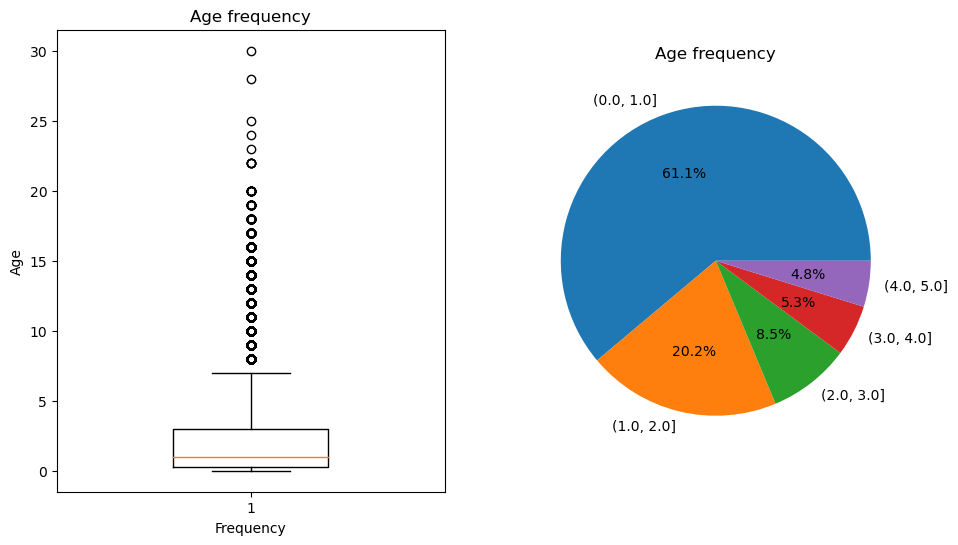

In [169]:
bin_age = [0.001,1,2,3,4,5]
univariate_age(intakes, 'Age upon Intake', bin_age, "Age frequency")

### Vizualizace *"DateTime"*
Z předchozích kroků víme, že data vypadají následovně: 
* rok-měsíc-den hodina:minuta:sekunda (pro vizualizaci používám pouze rok)

Tyto data nám určují přesný čas a datum příchodu zvířete do útulku. <br>
Z dat jsem použil pouze rok, aby bylo vše více přehledné. Proto se budu soustředit na počet přijatých zvířat každý rok. <br><br>
Vizualizace:
* Tabulka četností
* Countplot
* Pie

In [170]:
def univariate_year(years, custom_bins, title):
    stats = pd.DataFrame(data={
        'Frequency': years.value_counts(),
        'Relative frequency': years.value_counts(normalize=True) })
    
    display(stats)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))
    plt.title(title)
    sns.countplot(data=years, x=years, order=custom_bins, ax=ax1)

    ax1.bar_label(ax1.containers[0])
    ax1.set_xlabel("Year")
    ax1.set_ylabel("Year frequency")
    ax1.set_title(title)
    
    ax2.pie(years.value_counts(), labels=custom_bins, autopct='%1.1f%%')

,Frequency,Relative frequency
2015,13267,0.136351
2019,13005,0.133659
2014,12635,0.129856
2016,12563,0.129116
2017,12093,0.124286
2018,11462,0.117801
2021,9922,0.101973
2020,6425,0.066033
2013,3027,0.031110
2022,2901,0.029815


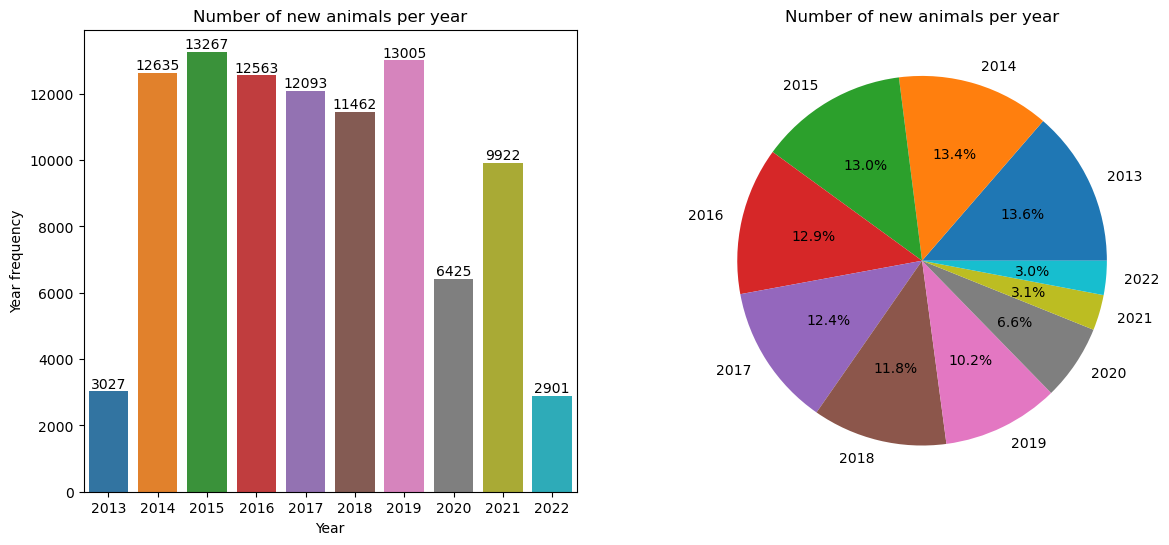

In [171]:
# Extract years from DateTime 
#get_years = pd.to_datetime(intakes['DateTime'], errors='coerce').dt.year.astype(object)
# get_years is already used, code is here for better understand or if we'll need to change it

# Get unique years and sort them
get_bins = get_years.unique()
get_bins = sorted(get_bins)
univariate_year(get_years, get_bins, 'Number of new animals per year')

* Na grafu **Number of new animals per month** je vidět, že data během jednotlivých měsíců jsou velmi podobná.

In [172]:
def univariate_date_bar(years, custom_bins, title, ax_X, xtick):
    axl = sns.countplot(data=years, x=years, order=custom_bins, ax=ax_X)
    axl.bar_label(axl.containers[0])
    axl.set_xlabel("Month")
    axl.set_ylabel("Number of animals")
    axl.set_title(title)
    if xtick is not None:
        axl.set_xticklabels(xtick)
    plt.figure(figsize=(12, 12))
    plt.show(axl)

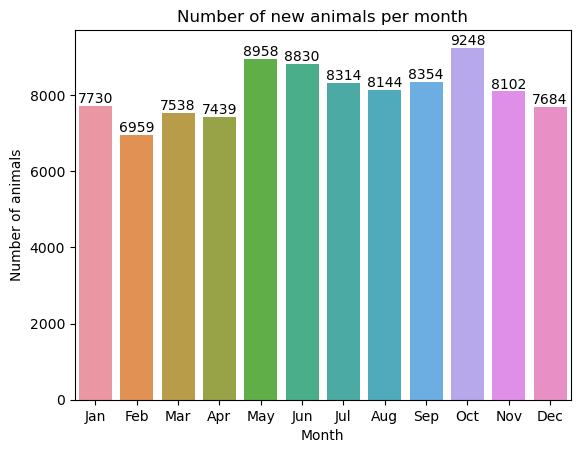

<Figure size 1200x1200 with 0 Axes>

In [173]:
# Extract months from DateTime
get_month = pd.to_datetime(intakes['DateTime'], errors='coerce').dt.month.astype(object)
labels_months = ["Jan", "Feb", "Mar", "Apr",
                    "May", "Jun", "Jul", "Aug", "Sep", 
                    "Oct", "Nov", "Dec"]
# Get unique years and sort them
get_bins_m = get_month.unique()
get_bins_m = sorted(get_bins_m)
univariate_date_bar(get_month, get_bins_m, 
'Number of new animals per month', None, labels_months
)

### Vizualizace *"Animal type"*
Z předchozích kroků víme, že data vypadají následovně: 
* typ zvířete

Tyto data nám určují jaký typ zvířete byl adoptován. <br>
Z tabulky četností je vidět, že nejoblíbenější zvíře k adopci je pes a následuje kočka. <br><br>
Vizualizace:
* Tabulka četností
* Countplot

In [174]:
def univariate_animal(data, custom_bins, title):
    stats = pd.DataFrame(data={
        'Frequency': data.value_counts(),
        'Relative frequency': data.value_counts(normalize=True) })
    
    display(stats)
    
    fig, ax1 = plt.subplots(1)
    sns.countplot(data=data, x=data, order=custom_bins, ax=ax1)

    ax1.bar_label(ax1.containers[0])
    ax1.set_ylabel("Number of animals")
    ax1.set_title(title)

['Cat', 'Dog', 'Other', 'Bird', 'Livestock']
Categories (5, object): ['Bird', 'Cat', 'Dog', 'Livestock', 'Other']

,Frequency,Relative frequency
Dog,65483,0.671627
Cat,30780,0.315696
Other,1087,0.011149
Bird,146,0.001497
Livestock,3,0.000031


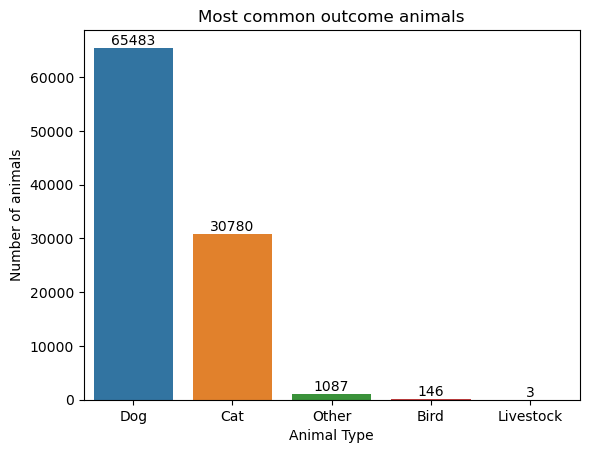

In [175]:
# Find all types of animals
display(outcomes['Animal Type'].unique())
data = outcomes['Animal Type']
cnt = outcomes['Animal Type'].value_counts()
types = ['Dog', 'Cat', 'Other', 'Bird', 'Livestock']

univariate_animal(data, types, 'Most common outcome animals')

### Vizualizace *"Type of intakes"*
Z předchozích kroků víme, že data vypadají následovně: 
* typ příchodu

Tyto data nám určují za jakých okolností bylo zvíře vzato do útulku. <br>
Z tabulky četností je vidět, že nejčastější důvod bylo zatoulavé zvíře. <br><br>
Vizualizace:
* Tabulka četností
* Countplot

In [176]:
def univariate_intake(data, custom_bins, title):
    stats = pd.DataFrame(data={
        'Frequency': data.value_counts(),
        'Relative frequency': data.value_counts(normalize=True) })
    
    display(stats)
    
    fig, ax1 = plt.subplots(1, figsize=(9,5))
    sns.countplot(data=data, x=data, order=custom_bins, ax=ax1)
    ax1.bar_label(ax1.containers[0])
    ax1.set_ylabel("Number of animals")
    ax1.set_title(title)

['Stray', 'Owner Surrender', 'Public Assist', 'Euthanasia Request', 'Abandoned', 'Wildlife']
Categories (6, object): ['Abandoned', 'Euthanasia Request', 'Owner Surrender', 'Public Assist', 'Stray', 'Wildlife']

,Frequency,Relative frequency
Stray,63183,0.649363
Owner Surrender,25813,0.265293
Public Assist,7449,0.076557
Abandoned,556,0.005714
Euthanasia Request,236,0.002425
Wildlife,63,0.000647


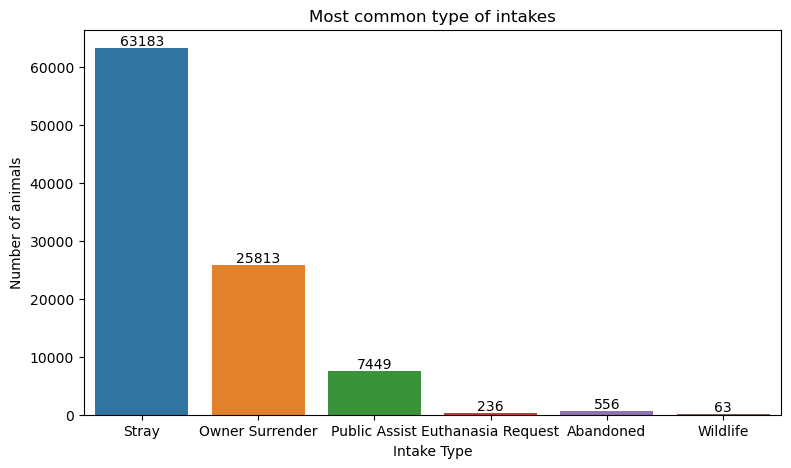

In [177]:
# Find all intake types
display(intakes['Intake Type'].unique())
data = intakes['Intake Type']
cnt = intakes['Intake Type'].value_counts()
types = ['Stray', 'Owner Surrender', 'Public Assist', 'Euthanasia Request', 'Abandoned', 'Wildlife']

univariate_intake(data, types, 'Most common type of intakes')

### Vizualizace *"Type of outcomes"*
Z předchozích kroků víme, že data vypadají následovně: 
* typ odchodu

Tyto data nám určují za jakých okolností bylo zvíře vzato pryč z útulku. <br>
Z tabulky četností je vidět, že nejčastější důvod byla adopce. <br><br>
Vizualizace:
* Tabulka četností
* Countplot

In [178]:
def univariate_outcome(data, custom_bins, title):
    stats = pd.DataFrame(data={
        'Frequency': data.value_counts(),
        'Relative frequency': data.value_counts(normalize=True) })
    
    display(stats)
    
    fig, ax1 = plt.subplots(1, figsize=(12,6))
    sns.countplot(data=data, x=data, order=custom_bins, ax=ax1)
    
    ax1.bar_label(ax1.containers[0])
    ax1.set_ylabel("Number of animals")
    ax1.set_title(title)

['Rto-Adopt', 'Adoption', 'Return to Owner', 'Transfer', 'Euthanasia', 'Died', 'Missing', NaN, 'Disposal', 'Relocate']
Categories (9, object): ['Adoption', 'Died', 'Disposal', 'Euthanasia', ..., 'Relocate', 'Return to Owner', 'Rto-Adopt', 'Transfer']

,Frequency,Relative frequency
Adoption,52661,0.540190
Return to Owner,22118,0.226884
Transfer,19453,0.199547
Euthanasia,1867,0.019151
Rto-Adopt,859,0.008812
Died,426,0.004370
Missing,54,0.000554
Disposal,47,0.000482
Relocate,1,0.000010


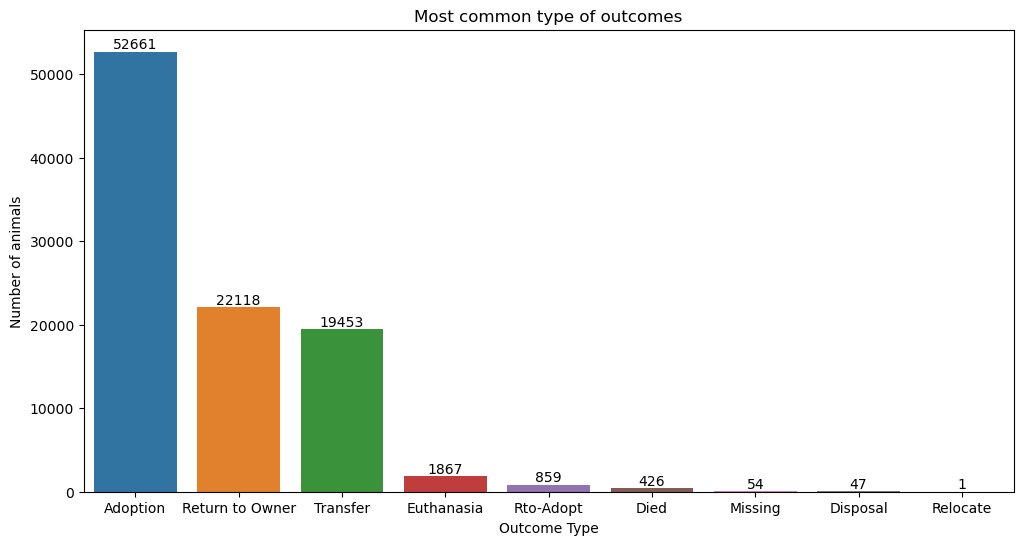

In [179]:
# Find all outcome types
display(outcomes['Outcome Type'].unique())
data = outcomes['Outcome Type']
types = ['Adoption', 'Return to Owner', 'Transfer', 
        'Euthanasia', 'Rto-Adopt', 'Died', 'Missing', 'Disposal', 'Relocate']

univariate_outcome(data, types, 'Most common type of outcomes')

# Korelace
Z přednášky: <br> 
* *Její míru vyjadřuje korelační koeficient s hodnotami od -1 do 1:*
    * *1 = přímá závislost (když jedna proměnná roste, roste i druhá proměnná).*
    * *0 = absence korelace (žádný lineární (!) vztah).*
    * *-1 = nepřímá závislost (když jedna proměnná roste, druhá klesá).*
* *Pokud 1 nebo -1, pak to nejčastěji znamená, že jedna proměnná je vypočítaná z druhé a nemá tak pro další analýzu většinou přínos.* <br>

Díky heatmap vidíme, že se všechny hodnoty pohybují kolem 0, tudíž je mezi nima minimální korelace. 
1) Typ zvířete při příchodu do útulku
2) Typ zvířete při odchodu do útulku

In [180]:
def bivariate_types(data1, categorical1, data2, categorical2, tt):
    frequency_table = pd.crosstab(data1[categorical1], data2[categorical2])
    
    max = len(data1)
    if len(data2) > max:
        max = len(data2)
    ax1 = plt.axes()
    sns.heatmap(round(frequency_table.div(max), 5), cmap='crest', annot=True, fmt='g', ax=ax1)
    ax1.set_title(tt)
    ax1.set_xlabel("Intake animal type")
    ax1.set_ylabel("Outcome animal type")

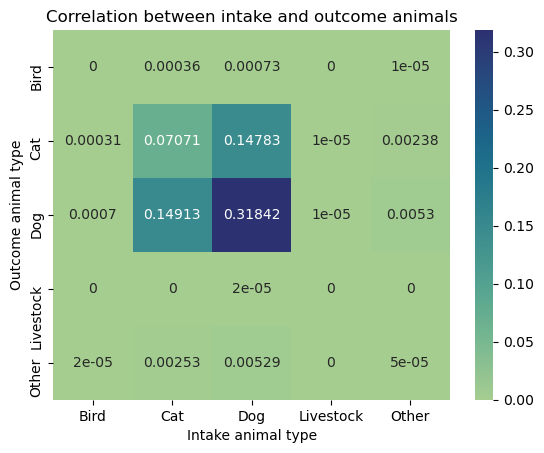

In [181]:
bivariate_types(intakes, 'Animal Type',
                outcomes, 'Animal Type',
                "Correlation between intake and outcome animals")

# Otázky

* **Závisí typ odchodu zvířete z útulku (Outcome Type) na typu příchodu (Intake Type)? Pokud chcete, uvažujte pro zjednodušení pouze zvířata, která se v každém datasetu vyskytují právě jednou.**

* Ano. Z tabulky vidíme, že například necelou polovinu adoptovaných zvířat tvoří zatoulaná zvířata. <br><br>
Vizualizace:
    * Výpis počtu zvířat u jednotlivých typů odchodu.
    * Crosstab

In [182]:
inta = intakes['Intake Type']
#display(inta.value_counts())
out = outcomes['Outcome Type']
display(out.value_counts())

pd.crosstab(index=out,
        columns=inta)

Adoption           52661
Return to Owner    22118
Transfer           19453
Euthanasia          1867
Rto-Adopt            859
Died                 426
Missing               54
Disposal              47
Relocate               1
Name: Outcome Type, dtype: int64

Intake Type,Abandoned,Euthanasia Request,Owner Surrender,Public Assist,Stray,Wildlife
Outcome Type,,,,,,
Adoption,225,78,9944,2850,23988,24
Died,3,2,75,23,188,0
Disposal,0,0,13,0,19,0
Euthanasia,8,0,309,107,878,0
Missing,0,0,9,0,26,0
Relocate,0,0,1,0,0,0
Return to Owner,94,44,4113,1217,10048,10
Rto-Adopt,4,2,153,39,417,2
Transfer,73,34,3676,1063,8843,10


* **Hraje věk zvířete roli při adopci?**
* Ano, hraje.
* Z grafu **A** vidíme, že zvířata jsou adoptována mezi 0 až 15 lety. Z grafu **B** vidíme, že nejvíce jsou adoptována zvířata ve věku 1 až 2 roky. <br><br>
Vizualizace:
    * Histogram
    * Countplot

In [183]:
def get_age(data, t1, t2):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    ax1.hist(data, label=[t1,t2])
    ax1.set_title("A - most common age")
    ax1.set_xlabel(t1)
    ax1.set_ylabel(t2)

    sns.countplot(data=data, x=data, order=[0,1,2,3,4,5,6,7,8,9,10], ax=ax2)
    ax2.set_title("B - most common age")
    ax2.set_xlabel(t1)
    ax2.set_ylabel(t2)

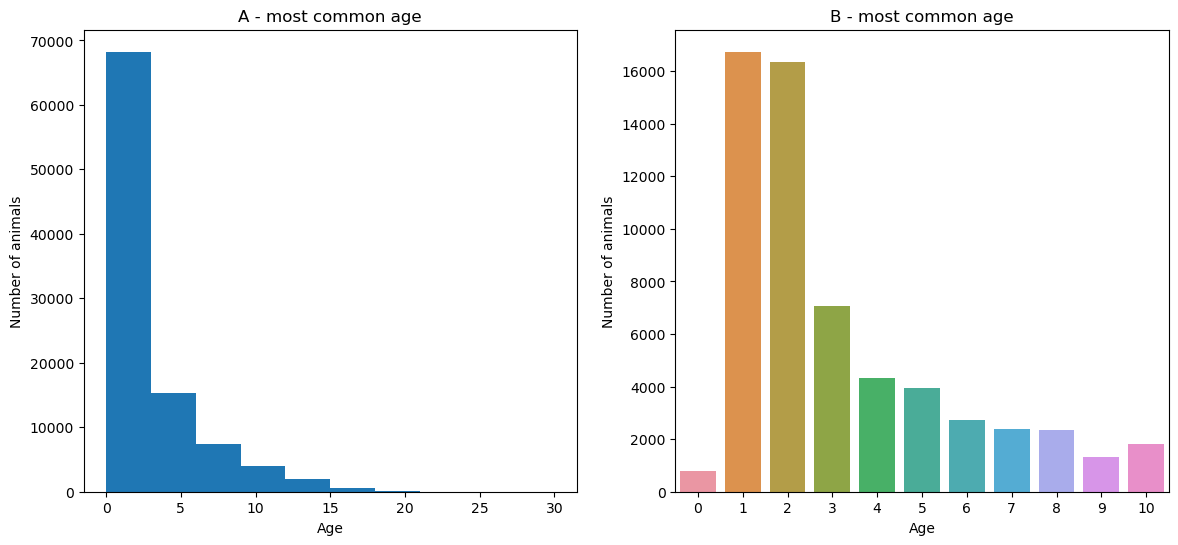

In [184]:
data = outcomes['Age upon Outcome']
get_age(data, "Age", "Number of animals")

* **Je příjem zvířat v rámci roku konstantní nebo existují období s větší/nižší zátěží?**
* Není konstatntí.
* Z grafu **Number of new animals per year** lze vidět, že máme vysoký pokles příjmu zvířat například v letech 2013, 2020 a 2022 oproti letům 2014-2019. <br><br>
Vizualizace:
    * Countplot

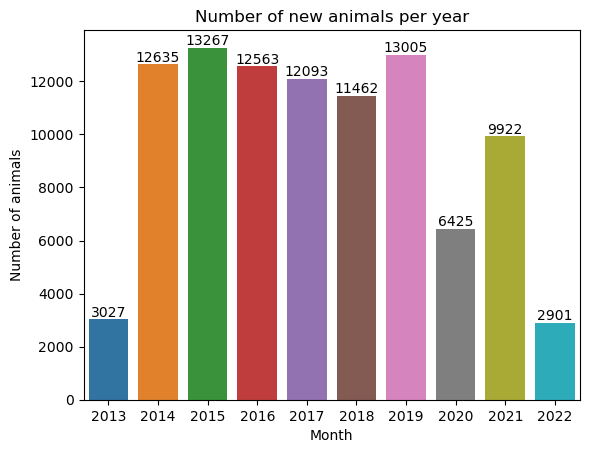

<Figure size 1200x1200 with 0 Axes>

In [185]:
ax1 = univariate_date_bar(get_years, get_bins, 'Number of new animals per year', None, None)

* **Je příjem zvířat v rámci měsíců konstantní?**
* Příjmy nejsou přímo konstantní, ale rozdíl v jednotlivých měsících je relativně malý, například se srovnáním oproti rokům (viz graf nad touto buňkou). <br><br>
Vizualizace:
    * Countplot

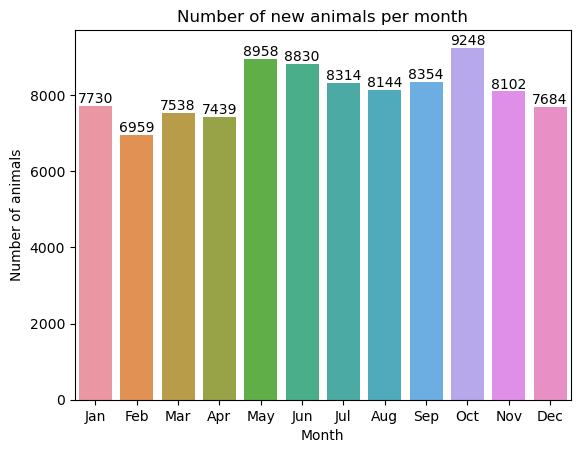

<Figure size 1200x1200 with 0 Axes>

In [186]:
univariate_date_bar(get_month, get_bins_m, 'Number of new animals per month', None, labels_months)

* **Má pohlaví zvířete vliv na odchod z útulku?** (Unknown zanedbáme)
* Ano, má. Samce si lidé berou o 2.7% častěji. <br><br>
Vizualizace:
    * Pie

['Neutered Male', 'Spayed Female', 'Intact Female', 'Intact Male', 'Unknown', NaN]
Categories (5, object): ['Intact Female', 'Intact Male', 'Neutered Male', 'Spayed Female', 'Unknown']

Male:  51108 
Female:  45882


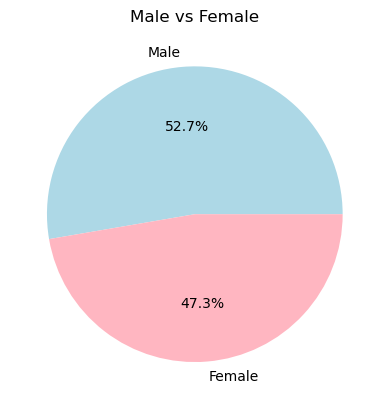

In [187]:
sex = outcomes['Sex upon Outcome']
display(sex.unique())
arr = ['Intact Female', 'Intact Male',
    'Neutered Male', 'Spayed Female']
male = 0
female = 0
for i in sex:
    if i == arr[0] or i == arr[3]:
        female = female + 1
    elif i == arr[1] or i == arr[2]:
        male = male + 1
 
get_sex = (male, female)
plt.pie(get_sex, labels=['Male', 'Female'], autopct='%1.1f%%', 
        colors=['lightblue','lightpink'])
plt.title("Male vs Female")
print("Male: ", male, "\nFemale: ", female)

* **Který měsíc má nejvíce zvířat narozeniny?**
* V dubnu slaví nejvíce zvířat narozeniny. <br><br>
Vizualizace:
    * Countplot

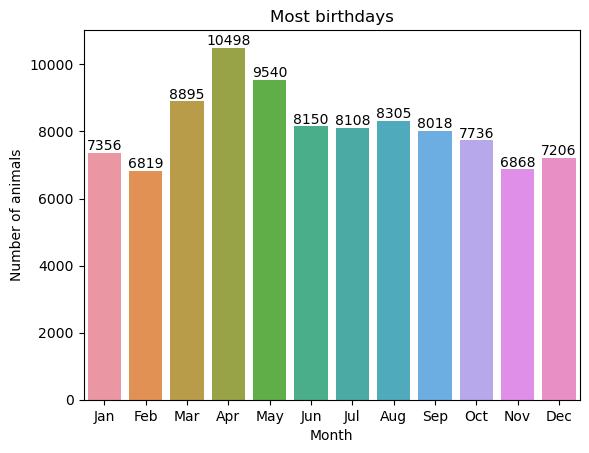

<Figure size 1200x1200 with 0 Axes>

In [188]:
birthday = pd.to_datetime(outcomes['Date of Birth'], 
    errors='coerce').dt.month.astype(object)
univariate_date_bar(birthday, None, 'Most birthdays', None, labels_months)

* **Je v útulku více kastrovaných zvířat, než nevykastrovaných?**
* Ano, je. Z grafu vidíme, že je o 12,7% více kastrovaných zvířat, než nekastrovaných. <br><br>
Vizualizace:
    * Pie

['Neutered Male', 'Spayed Female', 'Intact Male', 'Intact Female', 'Unknown']
Categories (5, object): ['Intact Female', 'Intact Male', 'Neutered Male', 'Spayed Female', 'Unknown']

Intact:  60700 
Neutered:  36085


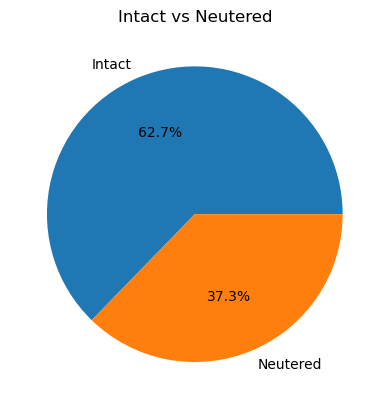

In [189]:
sex = intakes['Sex upon Intake']
display(sex.unique())
arr = ['Neutered Male', 'Spayed Female', 'Intact Male', 
        'Intact Female']
intact = 0
neutered = 0
for i in sex:
    if i == arr[0] or i == arr[1]:
        neutered = neutered + 1
    elif i == arr[2] or i == arr[3]:
        intact = intact + 1
 
get_sex = (intact, neutered)
plt.pie(get_sex, labels=['Intact', 'Neutered'], autopct='%1.1f%%')
plt.title("Intact vs Neutered")
print("Intact: ", intact, "\nNeutered: ", neutered)